# Widgets without writing widgets: interact

The `interact` function (`ipywidgets.interact`) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython's widgets.

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Basic `interact`

At the most basic level, `interact` autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use `interact`, you need to define a function that you want to explore. Here is a function that triples its argument, `x`.

In [2]:
def f(x):
    return 3 * x

When you pass this function as the first argument to `interact` along with an integer keyword argument (`x=10`), a slider is generated and bound to the function parameter.

In [3]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

When you move the slider, the function is called, and the return value is printed.

If you pass `True` or `False`, `interact` will generate a checkbox:

In [4]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

If you pass a string, `interact` will generate a `Text` field.

In [5]:
interact(f, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

`interact` can also be used as a decorator. This allows you to define a function and interact with it in a single shot. As this example shows, `interact` also works with functions that have multiple arguments.

In [6]:
@widgets.interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

## Fixing arguments using `fixed`

There are times when you may want to explore a function using `interact`, but fix one or more of its arguments to specific values. This can be accomplished by wrapping values with the `fixed` function.

In [7]:
def h(p, q):
    return (p, q)

When we call `interact`, we pass `fixed(20)` for q to hold it fixed at a value of `20`.

In [8]:
interact(h, p=5, q=fixed(20));

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-in…

Notice that a slider is only produced for `p` as the value of `q` is fixed.

## Widget abbreviations

When you pass an integer-valued keyword argument of `10` (`x=10`) to `interact`, it generates an integer-valued slider control with a range of `[-10, +3*10]`. In this case, `10` is an *abbreviation* for an actual slider widget:

```python
IntSlider(min=-10, max=30, step=1, value=10)
```

In fact, we can get the same result if we pass this `IntSlider` as the keyword argument for `x`:

In [9]:
interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

This examples clarifies how `interact` processes its keyword arguments:

1. If the keyword argument is a `Widget` instance with a `value` attribute, that widget is used. Any widget with a `value` attribute can be used, even custom ones.
2. Otherwise, the value is treated as a *widget abbreviation* that is converted to a widget before it is used.

The following table gives an overview of different widget abbreviations:

<table class="table table-condensed table-bordered">
  <tr><td><strong>Keyword argument</strong></td><td><strong>Widget</strong></td></tr>  
  <tr><td>`True` or `False`</td><td>Checkbox</td></tr>  
  <tr><td>`'Hi there'`</td><td>Text</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if integers are passed</td><td>IntSlider</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if floats are passed</td><td>FloatSlider</td></tr>
  <tr><td>`['orange','apple']` or `[('one', 1), ('two', 2)]`</td><td>Dropdown</td></tr>
</table>
Note that a dropdown is used if a list or a list of tuples is given (signifying discrete choices), and a slider is used if a tuple is given (signifying a range).

You have seen how the checkbox and text widgets work above. Here, more details about the different abbreviations for sliders and dropdowns are given.

If a 2-tuple of integers is passed `(min, max)`, an integer-valued slider is produced with those minimum and maximum values (inclusively). In this case, the default step size of `1` is used.

In [10]:
interact(f, x=(0, 4));

interactive(children=(IntSlider(value=2, description='x', max=4), Output()), _dom_classes=('widget-interact',)…

A `FloatSlider` is generated if any of the values are floating point. The step size can be changed by passing a third element in the tuple.

In [11]:
interact(f, x=(0, 10, 0.01));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.01), Output()), _dom_classes=('…

### Exercise: Reverse some text

Here is a function that takes text as an input and returns the text backwards.

In [12]:
def reverse(x):
    return x[::-1]

reverse('I am printed backwards.')

'.sdrawkcab detnirp ma I'

Use `interact` to make interactive controls for this function.

In [13]:
interact(reverse, x="Hello")

interactive(children=(Text(value='Hello', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.reverse(x)>

In [14]:
# %load solutions/reverse-text.py
def reverse(x):
    return x[::-1]

interact(reverse, x='Hello')


interactive(children=(Text(value='Hello', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.reverse(x)>

For both integer and float-valued sliders, you can pick the initial value of the widget by passing a default keyword argument to the underlying Python function. Here we set the initial value of a float slider to `5.5`.

In [15]:
@interact(x=(0.0, 20.0, 0.5))
def h(x=5.5):
    return x

interactive(children=(FloatSlider(value=5.5, description='x', max=20.0, step=0.5), Output()), _dom_classes=('w…

Dropdown menus are constructed by passing a list of strings. In this case, the strings are both used as the names in the dropdown menu UI and passed to the underlying Python function.

In [16]:
interact(f, x=['apples','oranges']);

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…

If you want a dropdown menu that passes non-string values to the Python function, you can pass a list of tuples of the form `('label', value)`. The first items are the names in the dropdown menu UI and the second items are values that are the arguments passed to the underlying Python function.

In [17]:
interact(f, x=[('one', 10), ('two', 20)]);

interactive(children=(Dropdown(description='x', options=(('one', 10), ('two', 20)), value=10), Output()), _dom…

## Basic interactive plot


The function below plots a straight line whose slope and intercept are given by its arguments.

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    fig = plt.figure()
    plt.clf()  # clear the current figure
    plt.grid()
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interact(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

<function __main__.f(m, b)>

## Fully interactive plot

While the above example works, it has some drawbacks:
1. It is inefficient to re-run all the plotting code (the whole plot gets re-created every time -- to see this, run the code above again after running the cell below and see how the figure numbers get incremented)
2. No zooming or panning
3. Screen can jump when moving the sliders

A better solution is to use the [ipympl](https://matplotlib.org/ipympl/) Matplotlib backend. You can activate this with the line magic: `%matplotlib ipympl`.

interactive(children=(FloatSlider(value=1.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.5, descr…

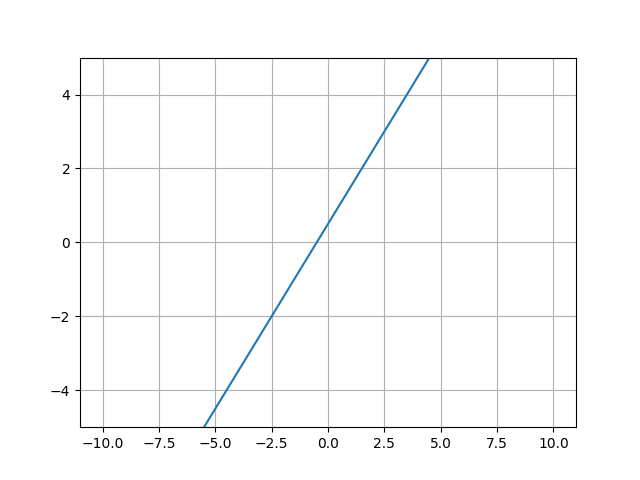

In [19]:
# Activate the widget based backend.
%matplotlib ipympl
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, num=1000)
fig, ax = plt.subplots()
ax.grid()
ax.set_ylim(-5, 5)
# Initialize a plot object with y = x. We'll be modifying y below.
# This returns a list of `.Line2D` representing the plotted data. We grab the first one -- we only have 1 series.
line = ax.plot(x, x)[0]

@interact(m=(-2.0, 2.0), b=(-3, 3, 0.5))
def update_line(m=1, b=0.5):
    line.set_ydata(m * x + b)
    # Request a widget redraw.
    fig.canvas.draw_idle()

## mpl-interactions

The [mpl-interactions](https://mpl-interactions.readthedocs.io/en/stable/) library can automate the updating of Matplotlib plots for you. Non-matplotlib keyword arguments passed to functions like `plot` will be interpreted to sliders and widget controls, similarly to `interact`, and automatically connected with the matplotlib plots.

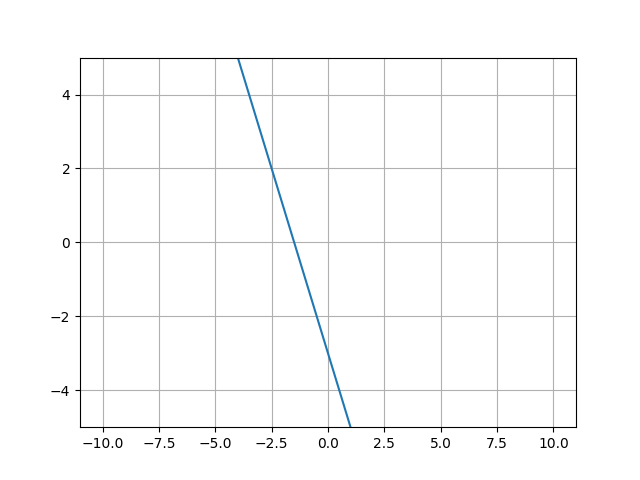

In [21]:
from mpl_interactions import ipyplot as iplt

fig, ax = plt.subplots()
ax.grid()
ax.set_ylim(-5,5)

# Define function in a way you can re-use in calculations
def f(x, m, b):
    return m * x + b
    
ctrls = iplt.plot(x, f, m=(-2,2), b=(-3, 3, 10))

### Exercise: Make a plot

Here is an example of making a plot of $f(x) = \sin(k x - p)$.


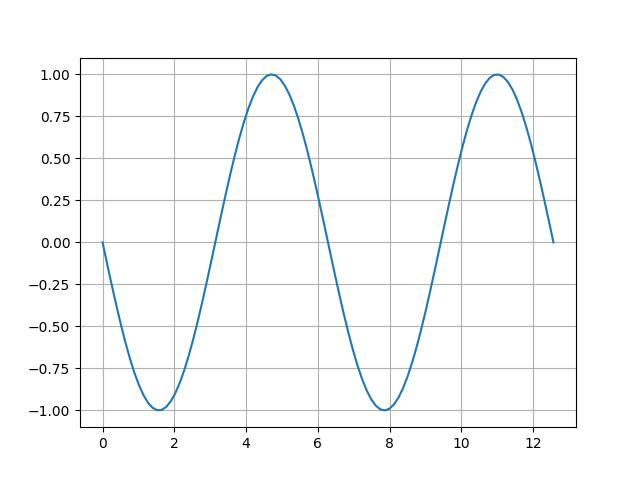

In [22]:
x = np.linspace(0, 4 * np.pi, 100)
k = 1
p = np.pi

def f(x, k, p):
    return np.sin(k*x - p)
fig, ax = plt.subplots()
ax.grid()
ax.plot(x, f(x, k, p))

Copy the above function definition and make it interactive using `interact` or `mpl-interactions`, so that there are sliders for the parameters $k$ and $p$, where $0.5\leq k \leq 2$ and $0 \leq p \leq 2\pi$ (hint: use `np.pi` for $\pi$).

interactive(children=(FloatSlider(value=1.25, description='k', max=2.0, min=0.5), FloatSlider(value=3.14159265…

<function __main__.plot_f(k, p)>

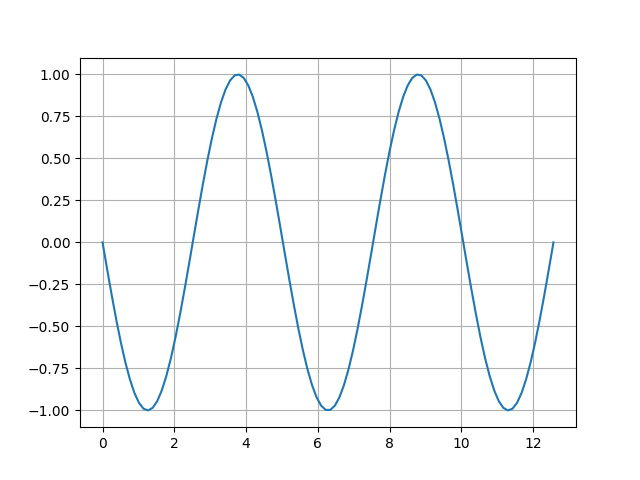

In [24]:
# %load solutions/plot-function-interact.py
# with interact

fig, ax = plt.subplots()
ax.grid()
line = ax.plot(x, f(x, k, p))[0]

def plot_f(k, p):
    line.set_ydata(f(x, k, p))
    # fig.canvas.draw_idle()
    
interact(plot_f, k=(0.5, 2), p=(0, 2 * np.pi))

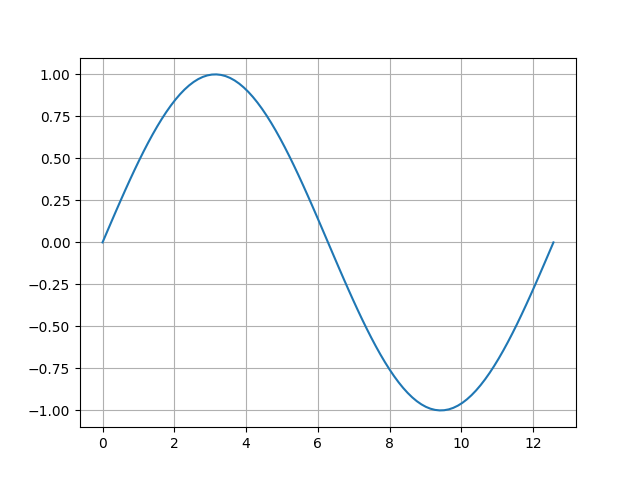

In [25]:
# %load solutions/plot-function-mpl-inter.py
fig, ax = plt.subplots()
ax.grid()
ctrls = iplt.plot(x, f, k=(.5, 2), p=(0, 2*np.pi))

# For more information 

See the notebook below ('OPTIONAL More About Interact') for more information about other ways of generating interactive controls for functions and for details about how to control when sliders are updated.

For more extended examples of `interact` and `interactive`, see [the example in the ipywidgets source repository](https://github.com/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Index.ipynb).